#Tasks

1. Load tiny imagenet data set of 200 classes
2. Run Resnet18 model
3. with 50 epocs reach >50% accuracy

--------------------------------------------------------------------

##Achieved : **56.03%** using tinyimage net with Resnet model  

Remarks:
Learnings:
1. modification of Resnet18 at avgpooling and number of classes
2. load the tiny imagenet data in the content folder not in the drive, because 
it will take more in loading sometime freezes the colab   
3. StepLR or ReduceLROnPlateau lr stepping should be done for every epoch and for cyclic stepping its for each iteration hence to be done with the training function



In [1]:
! pip install albumentations==0.4.6

     |████████████████████████████████| 122kB 5.0MB/s 
     |████████████████████████████████| 952kB 5.3MB/s 
  Created wheel for albumentations: filename=albumentations-0.4.6-cp37-none-any.whl size=65163 sha256=e0b9ffd2b6a4601ca460e5252a8aabcc31d2b634c67e5e70919c3060173a58d8
  Stored in directory: /root/.cache/pip/wheels/c7/f4/89/56d1bee5c421c36c1a951eeb4adcc32fbb82f5344c086efa14
Successfully built albumentations
  Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9
  Found existing installation: albumentations 0.1.12
    Uninstalling albumentations-0.1.12:
      Successfully uninstalled albumentations-0.1.12


In [1]:
!wget "http://cs231n.stanford.edu/tiny-imagenet-200.zip"

--2021-03-13 13:02:07--  http://cs231n.stanford.edu/tiny-imagenet-200.zip
Resolving cs231n.stanford.edu (cs231n.stanford.edu)... 171.64.68.10
Connecting to cs231n.stanford.edu (cs231n.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248100043 (237M) [application/zip]
Saving to: ‘tiny-imagenet-200.zip’

tiny-imagenet-200.z 100%[===================>] 236.61M  18.4MB/s    in 17s     

2021-03-13 13:02:24 (14.3 MB/s) - ‘tiny-imagenet-200.zip’ saved [248100043/248100043]



In [ ]:
# !ls

content  drive	sample_data  tiny-imagenet-200.zip


In [2]:
!unzip 'tiny-imagenet-200.zip'

Streaming output truncated to the last 5000 lines.
  inflating: tiny-imagenet-200/val/images/val_3979.JPEG  
  inflating: tiny-imagenet-200/val/images/val_3963.JPEG  
  inflating: tiny-imagenet-200/val/images/val_7199.JPEG  
  inflating: tiny-imagenet-200/val/images/val_2752.JPEG  
  inflating: tiny-imagenet-200/val/images/val_9687.JPEG  
  inflating: tiny-imagenet-200/val/images/val_9407.JPEG  
  inflating: tiny-imagenet-200/val/images/val_3603.JPEG  
  inflating: tiny-imagenet-200/val/images/val_3412.JPEG  
  inflating: tiny-imagenet-200/val/images/val_6982.JPEG  
  inflating: tiny-imagenet-200/val/images/val_8496.JPEG  
  inflating: tiny-imagenet-200/val/images/val_7332.JPEG  
  inflating: tiny-imagenet-200/val/images/val_9241.JPEG  
  inflating: tiny-imagenet-200/val/images/val_4196.JPEG  
  inflating: tiny-imagenet-200/val/images/val_5980.JPEG  
  inflating: tiny-imagenet-200/val/images/val_6697.JPEG  
  inflating: tiny-imagenet-200/val/images/val_9969.JPEG  
  inflating: tiny-ima

In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount= True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fphotos.native&response_type=code

Enter your authorization code:
4/1AY0e-g5Wk3R5xgTLXR_421QV_XT853sgDiaVeZxby9ftpiT565zi9H5Qlsw
Mounted at /content/drive


In [4]:
import sys
import os
sys.path.append('/content/gdrive/')
py_file_location = "/content/drive/My Drive/S12_TinyImageNet_Kmean/"
sys.path.append(os.path.abspath(py_file_location))

In [5]:
%cd '/content/drive/My Drive/S12_TinyImageNet_Kmean'
!pwd
!ls

/content/drive/My Drive/S12_TinyImageNet_Kmean
/content/drive/My Drive/S12_TinyImageNet_Kmean
customtransforms.py   __pycache__	 s12_gradcam.py    s12_test_file.py
dataloader.py	      s12_dataloader.py  s12_lrfinder.py   s12_train_file.py
learner_traintest.py  s12_displays.py	 s12_modelfile.py


In [ ]:
# from google.colab import files
# files.upload()  

In [6]:
# Import your module or file
from learner_traintest import Learner
from customtransforms import CustomTransforms
from dataloader import ImageDataLoader

from s12_dataloader import TinyImagenetDataLoader
from s12_train_file import customTrainingWithoutStepping
from s12_test_file import customTest
from s12_gradcam import GradCam
from s12_lrfinder import LRFinder 
from s12_displays import customPlots
from s12_modelfile import ResNet18

In [7]:

%matplotlib inline

In [8]:
import torch
import torchvision
import torchvision.transforms as transforms

In [9]:
SEED = 1
# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

# For reproducibility
torch.manual_seed(SEED)

if cuda:
    torch.cuda.manual_seed(SEED)

CUDA Available? True


##------------------------Call to Data Loader-------------------------

Albumentation method for data augmentation 
### use of Cutout in augmentation

In [10]:
import albumentations as A
DATA_DIR = '/content/tiny-imagenet-200/train/'

ct = CustomTransforms()

custom_train_tfms = [A.PadIfNeeded(min_height=72,min_width=72), 
                     A.RandomCrop(64, 64, p=1.0),
                     A.HorizontalFlip(),
                     A.Cutout(num_holes=2, max_h_size=16, max_w_size=16, fill_value=0, always_apply=False, p=0.4),
                     ]
train_transform,  test_transform = ct.build_transforms(train_tfms_list=custom_train_tfms, test_tfms_list=[])

image_loader = ImageDataLoader(train_transform, test_transform, DATA_DIR, batch_size=256, shuffle=True, figure_size=(20,10), test_pct=0.3)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
# import albumentations as A
# DIRPATH= '/content/tiny-imagenet-200/train/'
# input_batch_size =256

# imagenetLoader = TinyImagenetDataLoader()

# custom_train_tfms = [A.PadIfNeeded(min_height=72,min_width=72), 
#                      A.RandomCrop(64, 64, p=1.0),
#                      A.HorizontalFlip(),
#                      A.Cutout(num_holes=2, max_h_size=16, max_w_size=16, fill_value=0, always_apply=False, p=0.4)
#                      ]
# # cust_test_tfms_list =[A.Cutout(num_holes=0, max_h_size=16, max_w_size=16, fill_value=0, always_apply=False, p=0.4)
# #                      ]
# #train_transform,  test_transform = imagenetLoader.build_transforms(train_tfms_list=custom_train_tfms, test_tfms_list=[])
# #def tinyImgnetDataWithAugmentation(self,input_batch_size, input_num_workers, test_Partition = 0.1,cust_train_tfms_list=[], cust_test_tfms_list=[]):

# trainset, trainloader, testset, testloader, classes  = imagenetLoader.tinyImgnetDataWithAugmentation(DIRPATH,input_batch_size,input_num_workers =2,test_Partition = 0.3, cust_train_tfms_list=custom_train_tfms)

In [12]:
# print(len(classes))
# print(testset, trainset)
# print(trainloader)
# print(testloader)

##------------------ Visualize Input Image ---------------------------- 

---



---


Let us show some of the training images, for fun.


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


(256, 3, 64, 64)


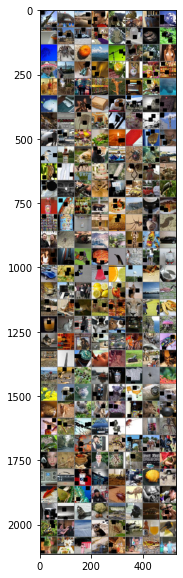

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy() 
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

# # get some random training images
dataiter = iter(image_loader.train_loader)
images, labels =  dataiter.next()
print(images.numpy().shape)  

plt.figure(figsize=(20,10))
# show images
imshow(torchvision.utils.make_grid(images))

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


(256, 3, 64, 64)


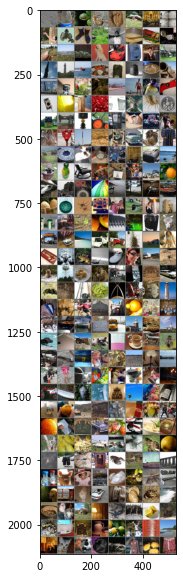

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy() 
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

# # get some random training images
dataiter = iter(image_loader.test_loader)
images, labels =  dataiter.next()
print(images.numpy().shape)  

plt.figure(figsize=(20,10))
# show images
imshow(torchvision.utils.make_grid(images))

##  ------------------------------Getting Resnet18 network from model file----------------------- 

1. Get the model
2. print summary
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

Copy the neural network from the Neural Networks section before and modify it to
take 3-channel images (instead of 1-channel images as it was defined).



In [15]:
# load to device and print model summary
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
# call now Resnet18 model
model = ResNet18(num_classes=200).to(device)
summary(model, input_size=(3, 64, 64))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 64, 64]           1,728
       BatchNorm2d-2           [-1, 64, 64, 64]             128
            Conv2d-3           [-1, 64, 64, 64]          36,864
       BatchNorm2d-4           [-1, 64, 64, 64]             128
            Conv2d-5           [-1, 64, 64, 64]          36,864
       BatchNorm2d-6           [-1, 64, 64, 64]             128
        BasicBlock-7           [-1, 64, 64, 64]               0
            Conv2d-8           [-1, 64, 64, 64]          36,864
       BatchNorm2d-9           [-1, 64, 64, 64]             128
           Conv2d-10           [-1, 64, 64, 64]          36,864
      BatchNorm2d-11           [-1, 64, 64, 64]             128
       BasicBlock-12           [-1, 64, 64, 64]               0
           Conv2d-13          [-1, 128, 32, 32]          73,728
      BatchNorm2d-14          [-1,

##------------------------------Calling training and testing  -------------------------

In [ ]:
# import torch.nn as nn
# import torch.optim as optim
# import torch.nn.functional as F

# model = ResNet18(num_classes=200).to(device)
# optimizer = optim.SGD(model.parameters(), lr=1e-7)#, weight_decay=0.1)
# criterion = F.nll_loss #nn.CrossEntropyLoss()
# lr_finder = LRFinder(model, optimizer, criterion, device="cuda" )
# lr_finder.range_test(train_loader=trainloader,val_loader=testloader, end_lr=3, num_iter=100)#, step_mode="linear"
# lr_finder.plot(log_lr=False)
# lr_finder.reset()

###Max lr value


Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 4.64E-02


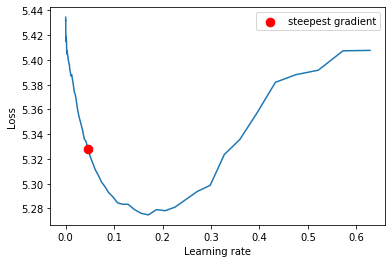

In [ ]:
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

model1 = ResNet18(num_classes=200).to(device)
optimizer = optim.SGD(model1.parameters(), lr=1e-4)#weight_decay=0.0
criterion = F.cross_entropy
lr_finder = LRFinder(model1, optimizer, criterion, device="cuda" )
lr_finder.range_test(train_loader=trainloader,end_lr=1, num_iter=100)
lr_finder.plot(log_lr=False)
lr_finder.reset()

Total training samples = 50000

batch size = 512

total iteration/epoch = 50000/512 = 97.65  approx = 98

total iteration for 5 epochs(to get maxLR) = 488.25 approx = 490 as 98*5

total iteration for 19 epochs (for step down) = 1855    considering approx = 98*19 = 1862


In [25]:
import torch.optim as optim
from torch.optim.lr_scheduler import CyclicLR, OneCycleLR,ReduceLROnPlateau
import torch.nn as nn
import torch.nn.functional as F

# train_loss = 0
# train_acc=0
# test_loss = 0
# test_acc= 0 
criterion = F.cross_entropy
Resnet_learner = Learner(train_loader=image_loader.train_loader, test_loader=image_loader.test_loader, model=ResNet18(num_classes=200),loss_func=criterion)
# Resnet_learner.summary(input_size=(3, 64, 64))

# train_losses, train_accs=[],[]
# test_losses, test_accs=[],[]

# criterion = nn.CrossEntropyLoss()
# model =  ResNet18(num_classes=200).to(device)#ResNet18().to(device)


lr_max=  4.64E-02
lr_min = lr_max/10

optimizer=optim.SGD(Resnet_learner.model.parameters(), lr=lr_max, momentum=0.9, weight_decay=Resnet_learner.weight_decay)
lr_scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=10, threshold=0.0001, threshold_mode='rel', cooldown=0, min_lr=lr_min, eps=1e-08, verbose=False )

# trainClass = customTrainingWithoutStepping(train_loader= trainloader,model=model,loss_func=criterion,device=device)
# testClass = customTest(test_loader=testloader,model=model,loss_func=criterion,device=device)

# optimizer = optim.SGD(model.parameters(), lr=lr_min)
# lr_scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=10, threshold=0.0001, threshold_mode='rel', cooldown=0, min_lr=lr_min, eps=1e-08, verbose=False )
#lr_scheduler = CyclicLR(optimizer, base_lr=lr_min, max_lr=lr_max, step_size_up=490, step_size_down=1862)
#lr_scheduler = OneCycleLR(optimizer, pct_start = 0.2, max_lr = lr_max, steps_per_epoch = 98, epochs=24, anneal_strategy= 'linear')

# EPOCHS = 1
# for epoch in range(EPOCHS):
#     #print("EPOCH:", epoch)
#     print('Epoch-{0} lr: {1}'.format(epoch, optimizer.param_groups[0]['lr']))
#     train_losses, train_accs = trainClass.trainWithoutStepping(optimizer,lr_scheduler)
#     test_losses, test_accs = testClass.test()
#     # lr_scheduler.step()
#     lr_scheduler.step(test_losses[-1])  

Resnet_learner.fit_custom(epochs=30,optimizer=optimizer,lr_scheduler=lr_scheduler,pass_loss=True)

  0%|          | 0/274 [00:00<?, ?it/s]

EPOCH: 0


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Loss=4.063185214996338 Batch_id=273 Accuracy=6.54: 100%|██████████| 274/274 [02:26<00:00,  1.87it/s]
  0%|          | 0/274 [00:00<?, ?it/s]


Test set: Average loss: 4.3964, Accuracy: 2557/30000 (8.52%)

EPOCH: 1


Loss=3.588740587234497 Batch_id=273 Accuracy=14.87: 100%|██████████| 274/274 [02:26<00:00,  1.87it/s]
  0%|          | 0/274 [00:00<?, ?it/s]


Test set: Average loss: 3.8395, Accuracy: 4831/30000 (16.10%)

EPOCH: 2


Loss=3.525676965713501 Batch_id=273 Accuracy=21.55: 100%|██████████| 274/274 [02:26<00:00,  1.87it/s]
  0%|          | 0/274 [00:00<?, ?it/s]


Test set: Average loss: 3.5591, Accuracy: 6167/30000 (20.56%)

EPOCH: 3


Loss=3.167257785797119 Batch_id=273 Accuracy=27.00: 100%|██████████| 274/274 [02:26<00:00,  1.87it/s]
  0%|          | 0/274 [00:00<?, ?it/s]


Test set: Average loss: 3.2501, Accuracy: 7590/30000 (25.30%)

EPOCH: 4


Loss=2.7756235599517822 Batch_id=273 Accuracy=30.88: 100%|██████████| 274/274 [02:26<00:00,  1.87it/s]
  0%|          | 0/274 [00:00<?, ?it/s]


Test set: Average loss: 3.1627, Accuracy: 8509/30000 (28.36%)

EPOCH: 5


Loss=2.6550981998443604 Batch_id=273 Accuracy=35.52: 100%|██████████| 274/274 [02:26<00:00,  1.87it/s]
  0%|          | 0/274 [00:00<?, ?it/s]


Test set: Average loss: 2.8408, Accuracy: 9967/30000 (33.22%)

EPOCH: 6


Loss=2.367215633392334 Batch_id=273 Accuracy=38.84: 100%|██████████| 274/274 [02:26<00:00,  1.87it/s]
  0%|          | 0/274 [00:00<?, ?it/s]


Test set: Average loss: 2.7437, Accuracy: 10543/30000 (35.14%)

EPOCH: 7


Loss=2.3586466312408447 Batch_id=273 Accuracy=42.15: 100%|██████████| 274/274 [02:26<00:00,  1.87it/s]
  0%|          | 0/274 [00:00<?, ?it/s]


Test set: Average loss: 2.7110, Accuracy: 10947/30000 (36.49%)

EPOCH: 8


Loss=2.1612699031829834 Batch_id=273 Accuracy=45.05: 100%|██████████| 274/274 [02:27<00:00,  1.86it/s]
  0%|          | 0/274 [00:00<?, ?it/s]


Test set: Average loss: 2.4600, Accuracy: 12235/30000 (40.78%)

EPOCH: 9


Loss=2.01084303855896 Batch_id=273 Accuracy=47.82: 100%|██████████| 274/274 [02:26<00:00,  1.87it/s]
  0%|          | 0/274 [00:00<?, ?it/s]


Test set: Average loss: 2.4023, Accuracy: 12711/30000 (42.37%)

EPOCH: 10


Loss=2.2922394275665283 Batch_id=273 Accuracy=50.09: 100%|██████████| 274/274 [02:26<00:00,  1.86it/s]
  0%|          | 0/274 [00:00<?, ?it/s]


Test set: Average loss: 2.4570, Accuracy: 12611/30000 (42.04%)

EPOCH: 11


Loss=1.5892351865768433 Batch_id=273 Accuracy=52.74: 100%|██████████| 274/274 [02:26<00:00,  1.86it/s]
  0%|          | 0/274 [00:00<?, ?it/s]


Test set: Average loss: 2.3912, Accuracy: 12890/30000 (42.97%)

EPOCH: 12


Loss=1.815240502357483 Batch_id=273 Accuracy=55.06: 100%|██████████| 274/274 [02:26<00:00,  1.86it/s]
  0%|          | 0/274 [00:00<?, ?it/s]


Test set: Average loss: 2.3791, Accuracy: 13336/30000 (44.45%)

EPOCH: 13


Loss=1.7845268249511719 Batch_id=273 Accuracy=57.16: 100%|██████████| 274/274 [02:27<00:00,  1.86it/s]
  0%|          | 0/274 [00:00<?, ?it/s]


Test set: Average loss: 2.2322, Accuracy: 13853/30000 (46.18%)

EPOCH: 14


Loss=2.053615093231201 Batch_id=273 Accuracy=59.65: 100%|██████████| 274/274 [02:27<00:00,  1.86it/s]
  0%|          | 0/274 [00:00<?, ?it/s]


Test set: Average loss: 2.2677, Accuracy: 14103/30000 (47.01%)

EPOCH: 15


Loss=1.5908098220825195 Batch_id=273 Accuracy=61.50: 100%|██████████| 274/274 [02:27<00:00,  1.86it/s]
  0%|          | 0/274 [00:00<?, ?it/s]


Test set: Average loss: 2.2652, Accuracy: 14143/30000 (47.14%)

EPOCH: 16


Loss=1.5787149667739868 Batch_id=273 Accuracy=63.60: 100%|██████████| 274/274 [02:27<00:00,  1.86it/s]
  0%|          | 0/274 [00:00<?, ?it/s]


Test set: Average loss: 2.1892, Accuracy: 14535/30000 (48.45%)

EPOCH: 17


Loss=1.381892204284668 Batch_id=273 Accuracy=65.77: 100%|██████████| 274/274 [02:27<00:00,  1.86it/s]
  0%|          | 0/274 [00:00<?, ?it/s]


Test set: Average loss: 2.3348, Accuracy: 14137/30000 (47.12%)

EPOCH: 18


Loss=1.4123042821884155 Batch_id=273 Accuracy=68.03: 100%|██████████| 274/274 [02:27<00:00,  1.86it/s]
  0%|          | 0/274 [00:00<?, ?it/s]


Test set: Average loss: 2.2054, Accuracy: 14887/30000 (49.62%)

EPOCH: 19


Loss=1.0987403392791748 Batch_id=273 Accuracy=69.89: 100%|██████████| 274/274 [02:27<00:00,  1.86it/s]
  0%|          | 0/274 [00:00<?, ?it/s]


Test set: Average loss: 2.2026, Accuracy: 14968/30000 (49.89%)

EPOCH: 20


Loss=0.9989932179450989 Batch_id=273 Accuracy=72.09: 100%|██████████| 274/274 [02:27<00:00,  1.86it/s]
  0%|          | 0/274 [00:00<?, ?it/s]


Test set: Average loss: 2.2808, Accuracy: 14713/30000 (49.04%)

EPOCH: 21


Loss=1.0612634420394897 Batch_id=273 Accuracy=74.39: 100%|██████████| 274/274 [02:27<00:00,  1.86it/s]
  0%|          | 0/274 [00:00<?, ?it/s]


Test set: Average loss: 2.3521, Accuracy: 14861/30000 (49.54%)

EPOCH: 22


Loss=1.0339787006378174 Batch_id=273 Accuracy=76.37: 100%|██████████| 274/274 [02:27<00:00,  1.86it/s]
  0%|          | 0/274 [00:00<?, ?it/s]


Test set: Average loss: 2.3219, Accuracy: 14989/30000 (49.96%)

EPOCH: 23


Loss=1.0804054737091064 Batch_id=273 Accuracy=78.38: 100%|██████████| 274/274 [02:27<00:00,  1.86it/s]
  0%|          | 0/274 [00:00<?, ?it/s]


Test set: Average loss: 2.2996, Accuracy: 15223/30000 (50.74%)

EPOCH: 24


Loss=0.7753432393074036 Batch_id=273 Accuracy=80.65: 100%|██████████| 274/274 [02:27<00:00,  1.86it/s]
  0%|          | 0/274 [00:00<?, ?it/s]


Test set: Average loss: 2.4086, Accuracy: 14928/30000 (49.76%)

EPOCH: 25


Loss=0.8971648812294006 Batch_id=273 Accuracy=82.13: 100%|██████████| 274/274 [02:27<00:00,  1.86it/s]
  0%|          | 0/274 [00:00<?, ?it/s]


Test set: Average loss: 2.4280, Accuracy: 15137/30000 (50.46%)

EPOCH: 26


Loss=0.811748206615448 Batch_id=273 Accuracy=84.11: 100%|██████████| 274/274 [02:26<00:00,  1.87it/s]
  0%|          | 0/274 [00:00<?, ?it/s]


Test set: Average loss: 2.5334, Accuracy: 15018/30000 (50.06%)

EPOCH: 27


Loss=0.5429667234420776 Batch_id=273 Accuracy=86.04: 100%|██████████| 274/274 [02:27<00:00,  1.86it/s]
  0%|          | 0/274 [00:00<?, ?it/s]


Test set: Average loss: 2.4591, Accuracy: 15378/30000 (51.26%)

EPOCH: 28


Loss=0.2267550230026245 Batch_id=273 Accuracy=93.83: 100%|██████████| 274/274 [02:27<00:00,  1.86it/s]
  0%|          | 0/274 [00:00<?, ?it/s]


Test set: Average loss: 2.1548, Accuracy: 16765/30000 (55.88%)

EPOCH: 29


Loss=0.1550697237253189 Batch_id=273 Accuracy=96.05: 100%|██████████| 274/274 [02:27<00:00,  1.86it/s]



Test set: Average loss: 2.1432, Accuracy: 16810/30000 (56.03%)



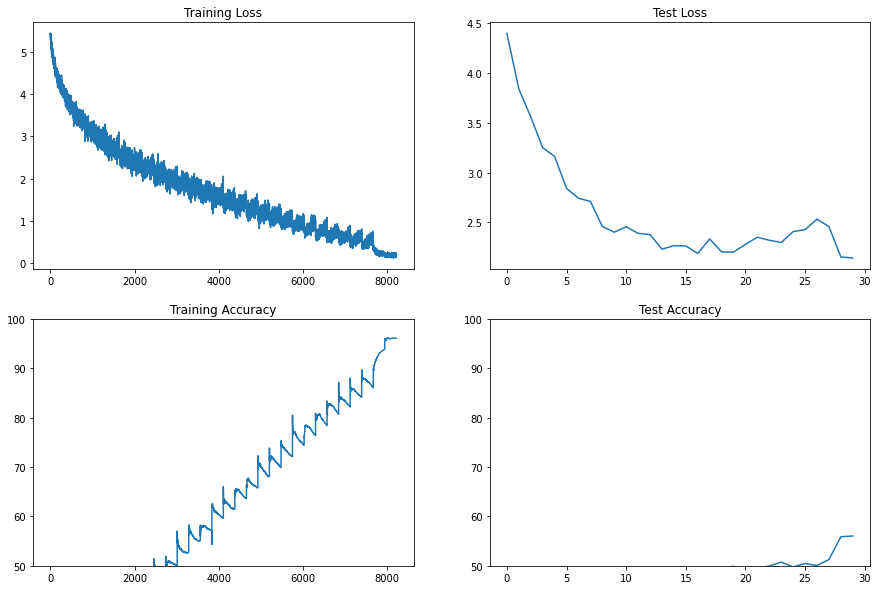

In [26]:
#call plot functions

# print(test_losses)
# print(train_losses)
# print(train_accs)
#dispFuns = customPlots(train_losses=train_losses, train_acc=train_accs, test_losses=test_losses, test_acc=test_accs)
#dispFuns.plot_losses()
Resnet_learner.plot_losses()